In [1]:
# Python学习经验分享

In [2]:
# 1. 为什么选择Python
# - 环境配置简单
# - 学习成本低
# - 学习曲线平缓
# - 应用广泛，从运维、爬虫、数据分析、机器学习、web开发、量化交易和各种功能整合。

In [3]:
# 2. 编程学习经验分享
# - 练习练习练习！！！代码就算抄一遍也会抄错的。
# - 多做笔记，建立自己的知识库。
# - 实现、改进、优化，早期不要钻牛角尖。
# - 我的一些github项目分享
#   - 爬虫：https://github.com/yingl/sc_fashion
#   - 数据结构和算法刷题：https://github.com/yingl/LintCodeInPython
#   - 数据分析教学：https://github.com/yingl/pydata-book
#   - 区块链模拟实现：https://github.com/yingl/bc_demo
#   - OKEX行情助手：https://github.com/yingl/bithelper
# - 教程推荐：https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000
# - Anaconda：https://anaconda.org/

In [4]:
# 3. Python语言的特点

In [1]:
# 弱类型，变量类型根据赋值决定。
x = 'abc'
print(type(x))
x = 123
print(type(x))
x = 12.34
print(type(x))

<class 'str'>
<class 'int'>
<class 'float'>


In [1]:
# main函数入口在哪里
if __name__ == '__main__':
    print('Here is the entry of main.')

Here is the entry of main.


In [9]:
# 函数是一等公民！
def f(x, y):
    return x * y

fxy = f
print(fxy(2, 3))

def fcall(f, x, y):
    return f(x, y)

print(fcall(f, 5, 6))

def fret(x, y): # 返回函数
    def f():
        return x * y
    return f

f = fret(3, 5)
print(f())
f = fret(6, 7)
print(f())

6
30
15
42


In [8]:
# 一切都是对象
x = 100 # 基本数据类型也不例外
print(type(x))
print(dir(x))

class Obj(object):
    pass

print(type(Obj)) # 类型本身也是对象
print(dir(Obj))

<class 'int'>
['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']
<class 'type'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__',

In [10]:
# 容器优先使用for ... in循环
li = [1, 2, 3, 4, 5]
for i in li:
    print(li)
    
di = {'a': 1, 'b': 2, 'c': 'three'}
for k, v in di.items():
    print(k, v)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
a 1
b 2
c three


In [12]:
# 利用yield主动交出函数控制权
def fib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
        yield a
        
for i in fib(10):
    print(i)

1
1
2
3
5
8
13
21
34
55


In [3]:
li = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def myrange(n):
    i = 0
    while i < n:
        yield i
        i += 1

for i in myrange(len(li)): # range => p2: xrange
    print(li[i])

1
2
3
4
5
6
7
8
9
10


In [1]:
# 4. Python常用库及基本功能演示

In [3]:
# requests处理HTTP请求，bs4解析HTML页面。
# 获取全国邮政编码
import requests
from bs4 import BeautifulSoup

BASE_LIB = 'html5lib'
BASE_URL = 'http://www.ip138.com'
UA = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'
HEADERS = {'user-agent':UA}

def handle_zip_code(province, url):
    print(province)
    resp = requests.get(url, headers=HEADERS)
    text = resp.text.encode('iso-8859-1').decode('gbk')
    bs = BeautifulSoup(text, BASE_LIB)
    rows = bs.select('table.t12 > tbody > tr')
    for i in range(1, len(rows)):
        items = rows[i].select('td')
        t_1 = items[0].text.strip()
        if t_1:
            print('\t%s, %s' % (t_1, items[1].text.strip()))
        if len(items) > 4:
            t_2 = items[3].text.strip()
            if t_2:
                print('\t%s, %s' % (t_2, items[4].text.strip()))
    
resp = requests.get(BASE_URL + '/post', headers=HEADERS)
text = resp.text.encode('iso-8859-1').decode('gbk')
bs = BeautifulSoup(text, BASE_LIB) # 默认使用lxml
for item in bs.select('div#newAlexa > table.t4 > tbody > tr > td > a'):
    handle_zip_code(item.text, BASE_URL + item.get('href'))
    break # 不然显示内容太多

北京市
	通县, 101100
	东城区, 100010
	西城区, 100032
	崇文区, 100061
	宣武区, 100054
	朝阳区, 100020
	丰台区, 100071
	石景山区, 100043
	海淀区, 100080
	门头沟区, 102300
	房山区, 102400
	通州区, 101100
	顺义区, 101300
	昌平区, 102200
	大兴区, 102600
	怀柔区, 101400
	平谷区, 101200
	密云区, 101500
	延庆区, 102100
	北京市, 100000


In [5]:
# pandas数据分析
# 使用tushare（http://tushare.org/）获取财经数据
import pandas as pd
import tushare as ts

data = ts.get_hist_data('600036',start='2018-01-01',end='2018-1-10')
data.index = pd.to_datetime(data.index) # 索引转换成时间序列
data = data[::-1] # 反转
data.loc[:, ['open', 'high', 'close', 'low', 'volume']]

,open,high,close,low,volume
date,,,,,
2018-01-02,29.02,30.06,29.63,29.02,675913.06
2018-01-03,29.74,30.48,29.98,29.64,718503.38
2018-01-04,30.28,30.36,29.67,29.40,516865.94
2018-01-05,29.87,30.25,30.12,29.46,479908.19
2018-01-08,29.92,30.05,29.48,29.31,658578.88
2018-01-09,29.52,29.91,29.75,29.35,398677.97
2018-01-10,29.66,30.77,30.54,29.58,799282.88
2018-01-11,30.52,31.15,30.92,30.40,540744.88
2018-01-12,31.12,31.58,31.50,31.02,487343.16


In [4]:
# Matplotlib绘图

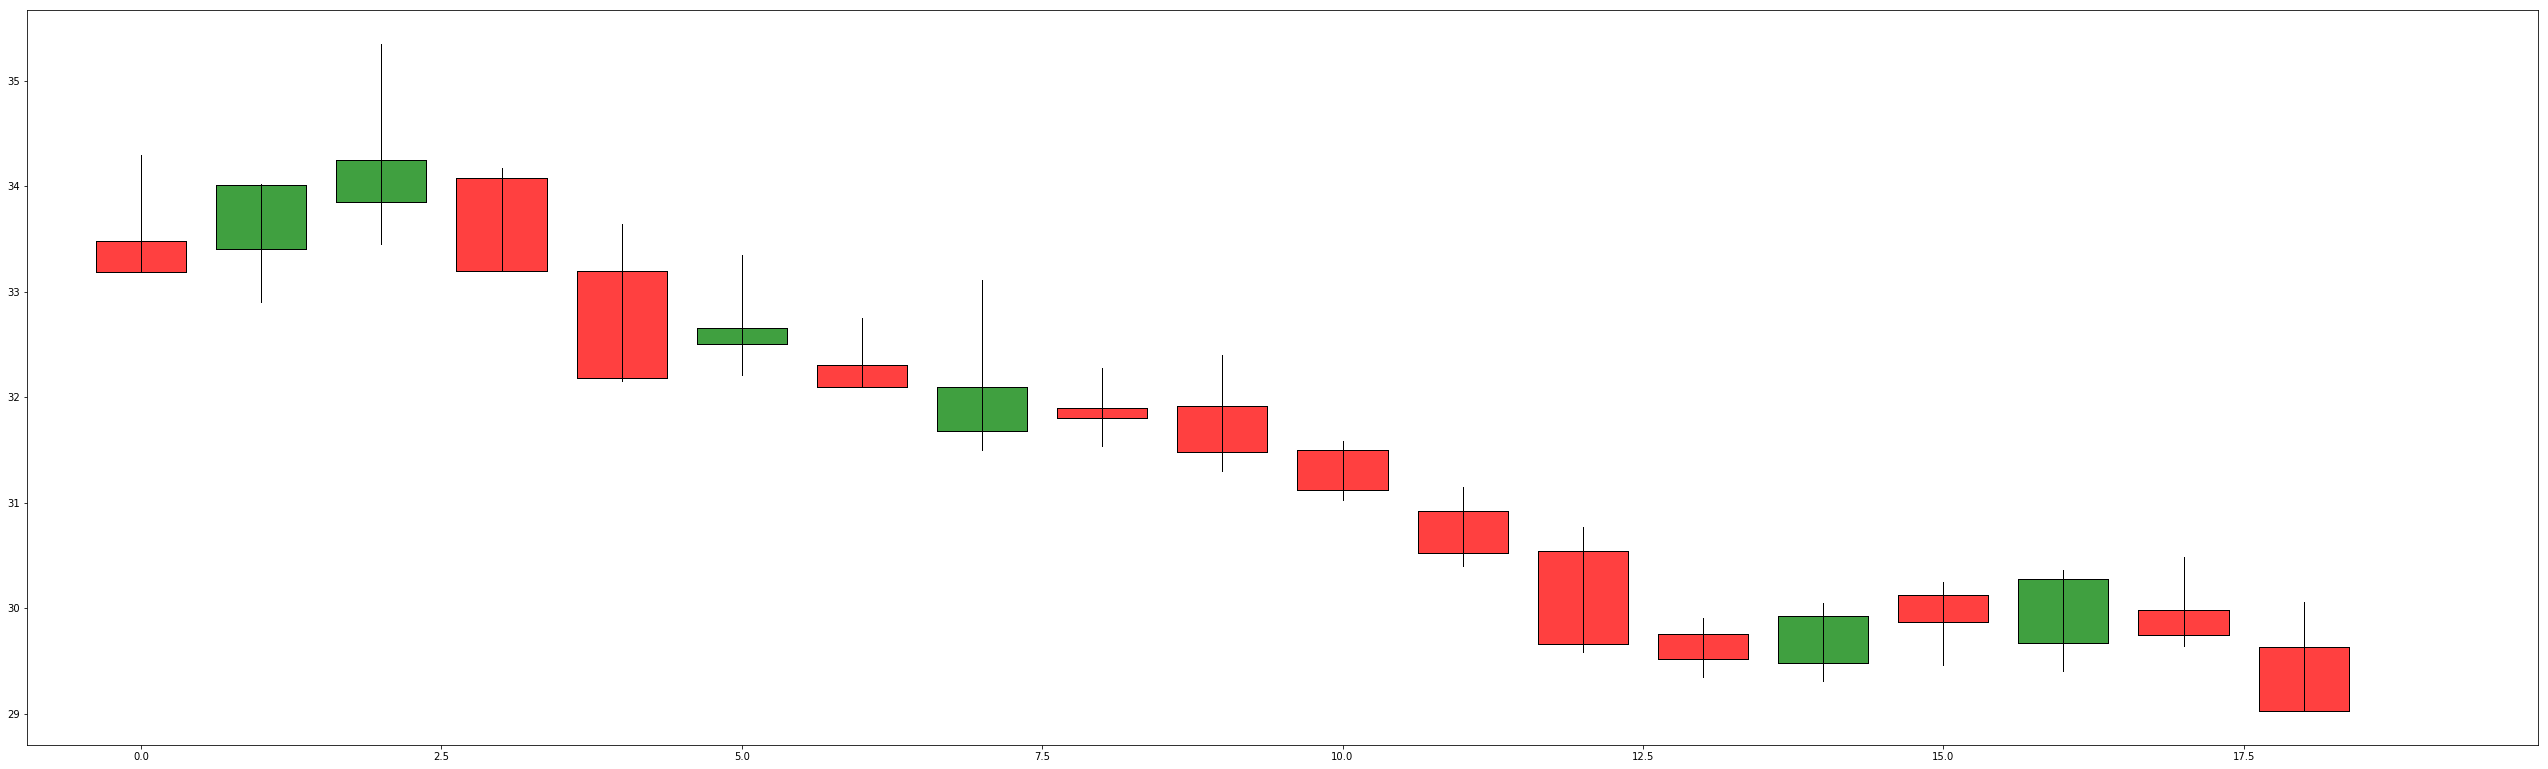

In [6]:
# 绘制股市K线
import matplotlib.finance as mpf
import matplotlib.pyplot as plt
%matplotlib inline

data = ts.get_hist_data('600036',start='2018-01-01',end='2018-1-10')
fig,ax = plt.subplots(figsize=(45, 15))
fig.subplots_adjust(bottom=0.2)
mpf.candlestick2_ochl(ax=ax, 
                      opens=data['open'].values,
                      closes=data['close'].values,
                      highs=data['high'].values,
                      lows=data['low'].values, 
                      width=0.75,
                      colorup='r',
                      colordown='g',
                      alpha=0.75)

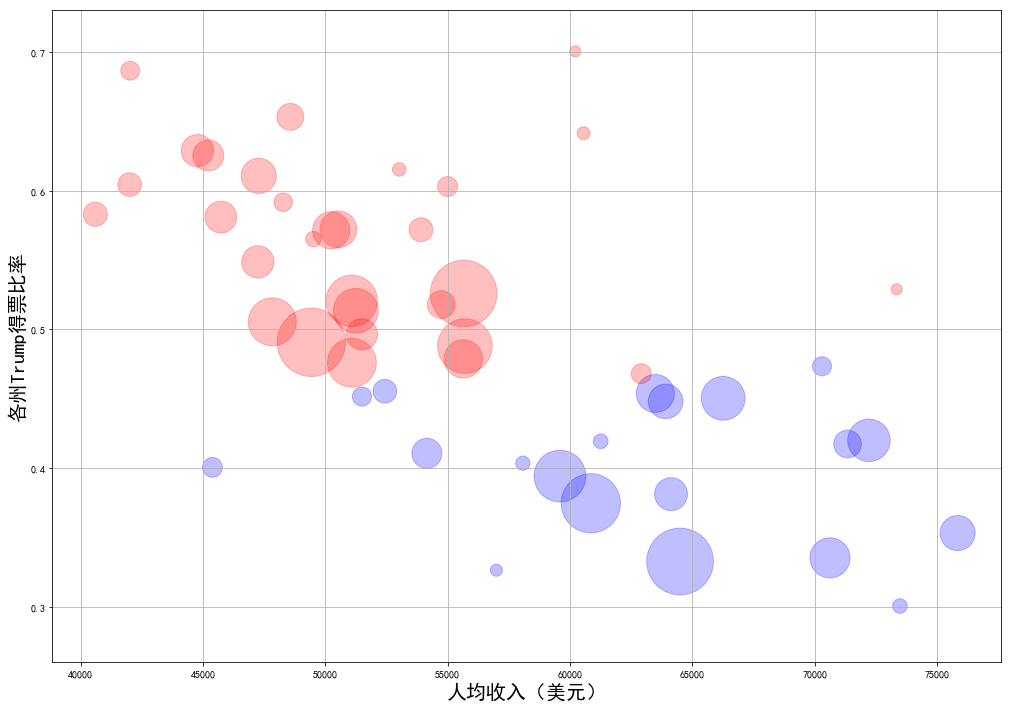

In [10]:
# 美国大选按州得票统计（同时展现各州人口与平均收入）
from pandas import Series, DataFrame

result_df = pd.read_csv('2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
# 分别提取Trump和Clinton的数据
trump_df = result_df[result_df['Candidate'] == 'Trump']
clinton_df = result_df[result_df['Candidate'] == 'Clinton']
# 合并成一张表并且按州分组
result_df = pd.merge(trump_df,
                     clinton_df,
                     on=['StateName', 'CountyName', 'CountyTotalVote'],
                     suffixes=['_t', '_c'])
result_df.drop('Party_t', axis=1, inplace=True)
result_df.drop('Party_c', axis=1, inplace=True)
result_df.drop('Candidate_t', axis=1, inplace=True)
result_df.drop('Candidate_c', axis=1, inplace=True)
result_df.columns = ['StateName', 'CountyName', 'TotalVote', 'VoteTrump', 'VoteClinton']
result_df = result_df.groupby(by=result_df['StateName'], as_index=False).sum() # 试下as_index不同值的区别
result_df.drop([8], inplace=True) # 删除district-of-columbia
result_df['T-Ratio'] = result_df['VoteTrump'] / result_df['TotalVote']
result_df['C-Ratio'] = result_df['VoteClinton'] / result_df['TotalVote']
result_df['Winner'] = list(map(lambda x, y: 'Trump' if x > y else 'Clinton', result_df['T-Ratio'], result_df['C-Ratio']))
# 读取收入数据
income_df = pd.read_csv('2015-us-income-by-county.csv')
# 合并收入数据
result_df = pd.merge(result_df, income_df, on=['StateName'])
# 画图
colors = result_df.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 2000.0 # 设置点大小
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.figure(figsize=(17, 12)) 
plt.scatter(x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, c=colors, alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.ylabel('各州Trump得票比率',fontsize=20)
plt.grid(True) # 添加网格

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


预测一张12英寸披萨价格：$13.68


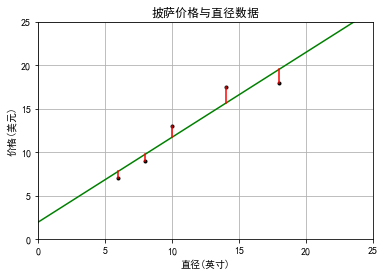

In [13]:
# SKlearn机器学习
# 简单的回归预测
#定义画图函数  
def runplt():  
    plt.figure()  
    plt.title('披萨价格与直径数据')  
    plt.xlabel('直径(英寸)')  
    plt.ylabel('价格(美元)')  
    plt.axis([0,25, 0,25])  
    plt.grid(True)  
    return plt  
  
#训练集数据  
X = [[6], [8], [10], [14], [18]]  
y = [[7], [9], [13], [17.5], [18]]  
  
#导入一元线性回归函数:y = α + βx  
from sklearn.linear_model import  LinearRegression  
model = LinearRegression()  
model.fit(X,y)  #训练集数据放入模型中  
print ('预测一张12英寸披萨价格：$%.2f' % model.predict([12]))   
  
  
plt = runplt()  
X2 = [[0],[10],[14],[25]]  
y2 = model.predict(X2)  #预测数据  
plt.plot(X,y,'k.')  
plt.plot(X2,y2,'g-')  
  
#残差预测值  
yr = model.predict(X)  
for idx,x in enumerate(X):  
    plt.plot([x,x], [y[idx], yr[idx]],'r-')  

In [ ]:
# 量化交易 - 使用聚宽平台（https://www.joinquant.com）
# 克隆自聚宽文章：https://www.joinquant.com/post/3423
# 标题：【量化课堂】羊驼交易系统
# 作者：JoinQuant量化课堂

# 羊驼交易系统 (基于动量策略)
# 日期2008年10月1日到2016年10月26日

from jqdata import *

'''
================================================================================
总体回测前
================================================================================
'''

#总体回测前要做的事情
def initialize(context):
    set_params()      #1 设置策参数
    set_variables()   #2 设置中间变量
    set_backtest()    #3 设置回测条件

#1 设置策略参数
def set_params():
    # 每次剔除手中收益率最低的change_No支股票
    g.change_No = 2
    g.N = 60             # 设置收益率回测区间（天数）
    g.tc = 60            # 设置调仓天数
    g.num_stocks = 20    # 设置持仓股票数目
    # 定义股票池，创业板指数成分股
    g.index='000300.XSHG'
    
#2 设置中间变量
def set_variables():
    g.t = 0                    # 记录回测运行的天数
    g.if_trade = False         # 当天是否交易
    g.feasible_stocks = []     # 当前可交易股票池

#3 设置回测条件
def set_backtest():
    set_benchmark('000300.XSHG')              # 设置为基准
    set_option('use_real_price', True)        # 用真实价格交易
    log.set_level('order', 'error')           # 设置报错等级

'''
================================================================================
每天开盘前
================================================================================
'''
#每天开盘前要做的事情
def before_trading_start(context):
    if g.t%g.tc==0:
        #每g.tc天，交易一次行
        g.if_trade=True 
        #4 设置可行股票池：获得当前开盘的股票池并剔除当前或者计算样本期间停牌的股票
        g.feasible_stocks = set_feasible_stocks(get_index_stocks(g.index),g.N,context)
		#5 设置手续费与手续费
        set_slip_fee(context) 
    g.t+=1


#4    
# 设置可行股票池
# 过滤掉当日停牌的股票,且筛选出前days天未停牌股票
# 输入：stock_list为list类型,样本天数days为int类型，context（见API）
# 输出：list=g.feasible_stocks
def set_feasible_stocks(stock_list,days,context):
    # 得到是否停牌信息的dataframe，停牌的1，未停牌得0
    suspened_info_df = get_price(list(stock_list), 
                       start_date=context.current_dt, 
                       end_date=context.current_dt, 
                       frequency='daily', 
                       fields='paused'
    )['paused'].T
    # 过滤停牌股票 返回dataframe
    unsuspened_index = suspened_info_df.iloc[:,0]<1
    # 得到当日未停牌股票的代码list:
    unsuspened_stocks = suspened_info_df[unsuspened_index].index
    # 进一步，筛选出前days天未曾停牌的股票list:
    feasible_stocks = []
    current_data = get_current_data()
    for stock in unsuspened_stocks:
        if sum(attribute_history(stock, days, unit = '1d',fields = ('paused'), skip_paused = False))[0] == 0:
            feasible_stocks.append(stock)
    return feasible_stocks
    
#5 根据不同的时间段设置滑点与手续费
def set_slip_fee(context):
    # 将滑点设置为0
    set_slippage(FixedSlippage(0)) 
    # 根据不同的时间段设置手续费
    dt=context.current_dt
    
    if dt>datetime.datetime(2013,1, 1):
        set_commission(PerTrade(buy_cost=0.0003, sell_cost=0.0013, min_cost=5)) 
        
    elif dt>datetime.datetime(2011,1, 1):
        set_commission(PerTrade(buy_cost=0.001, sell_cost=0.002, min_cost=5))
            
    elif dt>datetime.datetime(2009,1, 1):
        set_commission(PerTrade(buy_cost=0.002, sell_cost=0.003, min_cost=5))
                
    else:
        set_commission(PerTrade(buy_cost=0.003, sell_cost=0.004, min_cost=5))

'''
================================================================================
每天交易时
================================================================================
'''
def handle_data(context,data):
	# 如果为交易日
    if g.if_trade == True: 
	    #6 获得买入卖出信号，输入context，输出股票列表list
        (sell,buy)=get_signals(context) 
        #7 重新调整仓位，输入context,使用信号结果sell和buy
        rebalance(context, buy, sell)
	g.if_trade = False

#6
# 依本策略的卖出信号，得到应该卖出的股票列表
# 输入：context（见API）
# 输出：应该卖的股票列表，list类型
def get_signals(context):
    # 将昨天设置为收益率计算最后一天 返回datetime.date对象
    enddate = context.previous_date
    # 将昨日日期向前推g.N(这是个整数）得到收益率计算周期第一天 返回datetime.date对象
    startdate = shift_trading_day(enddate,-g.N)
    # 得到回测收益率的股票列表（由于上市、退市等因素，此列表与我们实际可交易股票有一定差异）返回list
    stocks = g.feasible_stocks
    # 按收益率降序排列 返回list
    sorted_list = stock_ret(stocks,startdate,enddate,asc = True)
    # 截取最高的g.num_stocks个可能进行购买的股票
    should_buy = sorted_list[0:g.change_No]
    # 当前持仓股票
    holding = list(context.portfolio.positions.keys())  
    # 如果当前空仓
    if len(list(context.portfolio.positions.keys()))==0:
        # 按照排名最差的g.num_stocks支股票建仓
        should_buy = sorted_list[0:g.num_stocks]
        # 卖出为空
        should_sell = []
    else:
        # 生成卖出股票list，当前为空
        should_sell = stock_ret(holding, startdate, enddate, asc = True)[0:g.change_No]
    # 如果一支持仓股票收益不好该卖
    for both in should_sell[:]:
        # 同时在所有可行股票里收益排名低该买
        if both in should_buy[:]:
            # 既不买入
            list(should_buy).remove(both)
            # 也不卖出
            list(should_sell).remove(both)
    # 返回两个list的元组
    return should_sell,should_buy

#7
# 依本策略的买入信号，得到应该买的股票列表
# 借用买入信号结果，不需额外输入
# 输入：context（见API）
def rebalance(context, buy, sell):
    # 卖出在卖出list中的股票
    for stock_to_sell in list(sell)[:]: 
        order_target_value(stock_to_sell, 0)
    # 把当前持仓股票和需要买入股票生成新的buy的列表，包括调仓头所有需要持有股票
    for stock in buy[:]:
        if stock in list(context.portfolio.positions.keys()):
            buy.append(stock)
    # 定义买入每日股票的金额
    every_stock = context.portfolio.portfolio_value/g.num_stocks
    # 调整每个股票到当前总市值/g.num_stocks金额
    for stock_to_buy in buy[:]:
        order_target_value(stock_to_buy, every_stock)
    for stock_to_buy in buy[:]:
        # 因order函数调整为顺序调整，为防止先行调仓股票由于后行调仓股票占金额过大不能一次调整到位，这里运行两次以解决这个问题
        order_target_value(stock_to_buy, every_stock)
        	
#8
# 某一日的前shift个交易日日期 
# 输入：date为datetime.date对象(是一个date，而不是datetime)；shift为int类型
# 输出：datetime.date对象(是一个date，而不是datetime)
def shift_trading_day(date,shift):
    # 获取所有的交易日，返回一个包含所有交易日的 list,元素值为 datetime.date 类型.
    tradingday = get_all_trade_days()
    # 得到date之后shift天那一天在列表中的行标号 返回一个数
    shiftday_index = list(tradingday).index(date)+shift
    # 根据行号返回该日日期 为datetime.date类型
    return tradingday[shiftday_index]

#9  
# 根据期间收益率（用前复权收盘价计算）给股票排名
# 输入：stock_list为list类型；startdate enddate为datetime.date对象；asc为布尔类型
# 输出：list类型
def stock_ret(stock_list,startdate,enddate,asc = False):
    # 得到回测区间内股票收盘价 返回dataframe
    log.info(startdate)
    df_close = get_price(list(stock_list),start_date = startdate, end_date = enddate, fields = 'close')['close'].T
    # 删去空值 返回dataframe
    df_close = df_close.dropna(axis = 0)
    # 计算回测区间收益率 返回dataframe
    df_close['ret']=(df_close[enddate]-df_close[startdate])/df_close[startdate]
    #按收益率降序排列，获取股票代码，返回list
    stocks = list(df_close.sort('ret', ascending = asc).index)
    # 返回股票代码list
    return stocks

'''
================================================================================
每天收盘后
================================================================================
'''
# 每日收盘后要做的事情（本策略中不需要）
def after_trading_end(context):
    return